<a href="https://colab.research.google.com/github/Aehteshaam-Shaikh/Ted-Talk-views-prediction/blob/main/Ted_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [74]:
#importing the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [284]:
Ted_df = pd.read_csv("/content/drive/MyDrive/Ted Talks Views Prediction - Aehteshaam Shaikh/data_ted_talks.csv")

#Exploratory Data Analysis 

In [285]:
# Let's see how the dataset looks like
Ted_df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [286]:
Ted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

* The Dataset consist of total 19 features and 4005 entries with some features consisting of Null Values

* Out of these 19 columns only 4 are Numeric and rest are either categorical or textual.

In [287]:
# Checking if any Duplicate values are present in the Dataset
Ted_df.duplicated().sum()

0

In [288]:
Ted_df.describe(include = 'all')

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
count,4005.000000,4005,4005,4001,3483,3502,4.005000e+03,4004,4005,4005,4005,4005,3350.000000,4005.000000,4005,4005,4005,4005,4005
unique,NaN,4005,3274,3306,2049,2977,NaN,1334,2962,459,12,3902,NaN,NaN,3977,4005,4005,4005,4005
top,NaN,The awful logic of land mines -- and an app th...,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,NaN,2017-04-24,2017-09-07,TED-Ed,en,['en'],NaN,NaN,"['TED-Ed', 'math']","{319: 'The next 5,000 days of the web', 118: '...",https://www.ted.com/talks/paul_hessburg_why_wi...,"Local politics -- schools, zoning, council ele...","In the mid-'90s, the CDC and Kaiser Permanente..."
freq,NaN,1,34,34,53,10,NaN,97,27,556,3957,24,NaN,NaN,8,1,1,1,1
mean,12432.538327,NaN,NaN,NaN,NaN,NaN,2.148006e+06,NaN,NaN,NaN,NaN,NaN,161.997015,724.011236,NaN,NaN,NaN,NaN,NaN
std,17447.576262,NaN,NaN,NaN,NaN,NaN,3.451226e+06,NaN,NaN,NaN,NaN,NaN,268.838922,361.775462,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN,NaN,NaN,NaN
25%,1252.000000,NaN,NaN,NaN,NaN,NaN,8.820690e+05,NaN,NaN,NaN,NaN,NaN,38.000000,393.000000,NaN,NaN,NaN,NaN,NaN
50%,2333.000000,NaN,NaN,NaN,NaN,NaN,1.375508e+06,NaN,NaN,NaN,NaN,NaN,89.000000,738.000000,NaN,NaN,NaN,NaN,NaN
75%,23777.000000,NaN,NaN,NaN,NaN,NaN,2.133110e+06,NaN,NaN,NaN,NaN,NaN,188.000000,974.000000,NaN,NaN,NaN,NaN,NaN


###Handling the Null values in the Dataset

In [289]:
Ted_df.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [290]:
Ted_df['about_speakers'][0]    

"{0: 'Nobel Laureate Al Gore focused the world’s attention on the global climate crisis. Now he’s showing us how we’re moving towards real solutions.\\r\\n'}"

As the 'about_speakers column gives the description about the speaker which may not be helpful in our journey

In [291]:
Ted_df.drop('about_speakers',axis=1,inplace=True)

In [292]:
Ted_df['recorded_date'].fillna('',inplace=True)  
Ted_df['comments'].fillna(Ted_df['comments'].mean(),inplace=True)
Ted_df['all_speakers'].fillna('',inplace= True)

In [293]:
# Setting the Null values in Occupation column to Others Category
Ted_df['occupations'].fillna(str({0:['Other']}),inplace = True)

In [294]:
Ted_df.isna().sum()

talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64

###Exploring the Published Date Column :

In [295]:
# Converting Published date column to datetime type
Ted_df['published_date'] = Ted_df['published_date'].apply((lambda x: datetime.strptime(x,"%Y-%m-%d")))

In [296]:
#extracting release day, month and year from the published date column
Ted_df['release_day']   = Ted_df['published_date'].apply(lambda x: x.weekday())
Ted_df['release_month'] = Ted_df['published_date'].apply(lambda x: x.month)
Ted_df['release_year']  = Ted_df['published_date'].apply(lambda x: x.year)

In [297]:
Ted_df

,talk_id,title,speaker_1,all_speakers,occupations,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,release_day,release_month,release_year
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.000000,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",1,6,2006
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.000000,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",1,6,2006
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.000000,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",1,6,2006
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.000000,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,1,6,2006
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.000000,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,1,6,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.000000,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B...",0,4,2020
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},{0: ['Other']},307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",161.997015,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo...",0,4,2020
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.000000,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself 

In [298]:
#encoding of release_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
Ted_df['release_day']=Ted_df['release_day'].map(week_day)

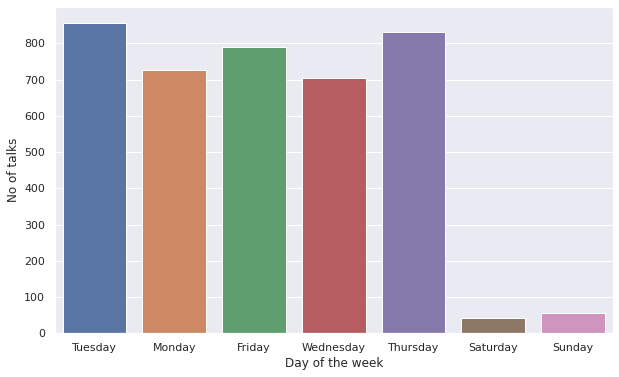

In [299]:
# checking the day of the week having maximum release date
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='release_day', data=Ted_df)
plt.xlabel('Day of the week')
plt.ylabel('No of talks');

* Most no of talks were released on tuesday followed by thursday

* As we can see on saturday and sunday very less ted talk videos were published


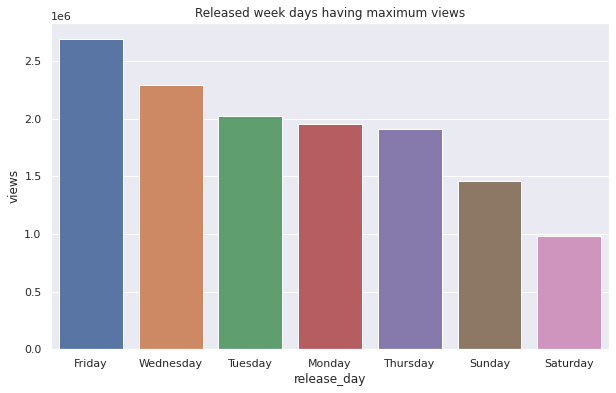

In [300]:
# release days with respect to views
views_per_day=Ted_df.groupby('release_day')['views'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
plt.title('Released week days having maximum views')
sns.barplot(x='release_day',y='views',data=views_per_day)

* Most no of views are for the videos which are released on Friday

In [301]:
#encoding release_month column with month names
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
Ted_df['release_month']=Ted_df['release_month'].map(month_dict)


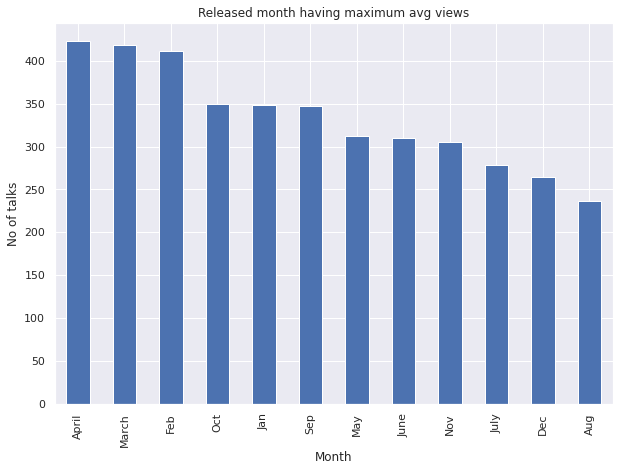

In [302]:
#checking months having maximum release 
plt.figure(figsize=(10,7))
Ted_df['release_month'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Released month having maximum avg views')
plt.xlabel('Month')
plt.ylabel('No of talks');



* Most no of talks were released on April followed by March and Feb.

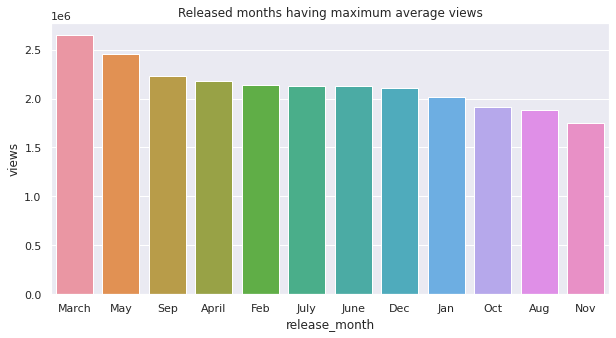

In [303]:
# Most popular release month by average Views
views_per_month=Ted_df.groupby('release_month')['views'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,5))
plt.title('Released months having maximum average views')
sns.barplot(x='release_month',y='views',data=views_per_month)

* Talks released in March have most views followed by May.

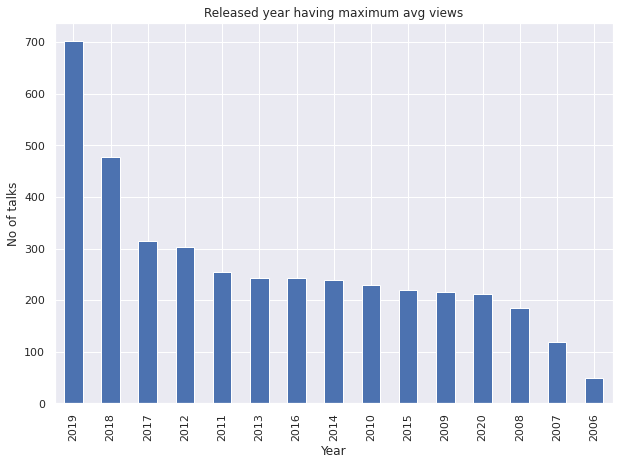

In [304]:
#checking years having maximum release 
plt.figure(figsize=(10,7))
Ted_df['release_year'].value_counts().plot(kind='bar')
plt.title('Released year having maximum avg views')
plt.xlabel('Year')
plt.ylabel('No of talks');

* Most no of Talks were released in year 2019 

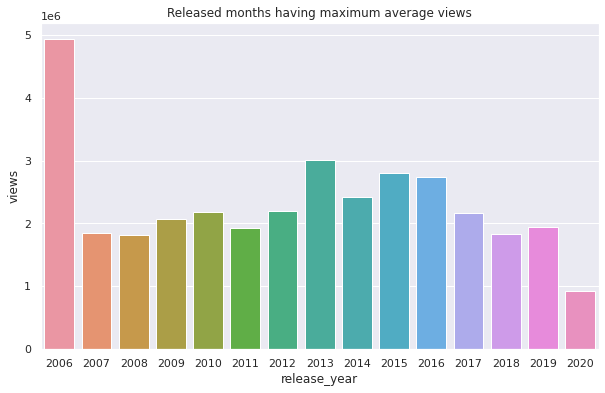

In [305]:
# Most popular release year by to average Views
views_per_year=Ted_df.groupby('release_year')['views'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
plt.title('Released months having maximum average views')
sns.barplot(x='release_year',y='views',data=views_per_year)

* Most no of Talks were released in year 2019 but Talks released in the year 2006 have the maximum views.

In [306]:
# Most viewed Ted Talks
most_viewed=Ted_df.nlargest(5, ['views'])
most_viewed[['speaker_1','views','title','release_year','duration']]

,speaker_1,views,title,release_year,duration
4,Sir Ken Robinson,65051954,Do schools kill creativity?,2006,1164
1296,Amy Cuddy,57074270,Your body language may shape who you are,2012,1262
2062,James Veitch,56932551,This is what happens when you reply to spam email,2016,588
646,Simon Sinek,49730580,How great leaders inspire action,2010,1084
796,Brené Brown,47544833,The power of vulnerability,2010,1219


* Sir Ken Robinson's 'Do schools kill creativity?' is the most viewed Talk with more than 65 million views.

In [307]:
Ted_df.groupby('speaker_1')['views'].sum().nlargest(15).reset_index()

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


* Alex Gendler is the most Popular speaker followed by Sir Ken Robinson	 

In [308]:
# exploring the various event categories
events=Ted_df.groupby('event')['views'].sum().nlargest(10).reset_index()

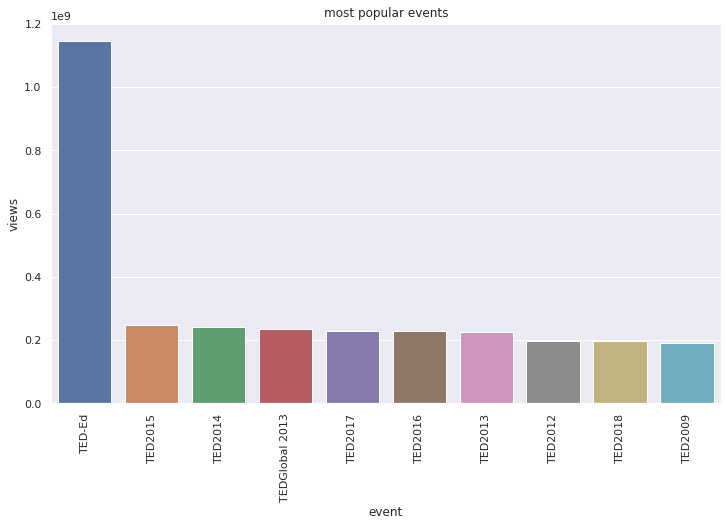

In [309]:
# Most popular event by No of Views
plt.figure(figsize=(12,7))
plt.title('most popular events')
sns.barplot(x='event',y='views',data=events)
plt.xticks(rotation=90)
plt.show()

* TED-Ed is the most popular event category with most no of views 

Text(0.5, 1.0, 'Native language')

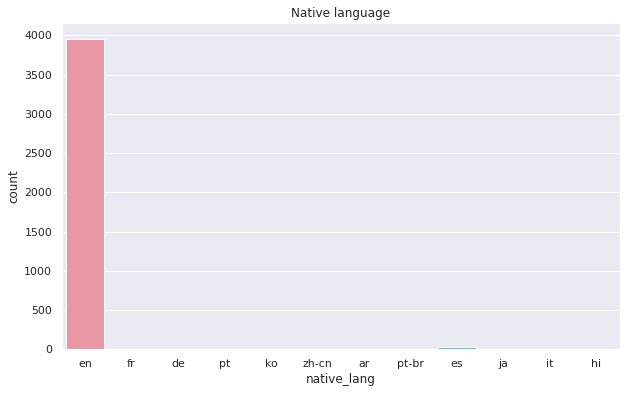

In [310]:
# native language column
#plotting the countplot of native_lang column
plt.figure(figsize=(10,6))
sns.countplot(x=Ted_df['native_lang'])
plt.title('Native language')

* almost 99% videos are recorded in english language

* We should drop this column as the data is very biaased here

In [311]:
# applying eval on occupations column
Ted_df['occupations'] = Ted_df.apply(lambda row: eval(row['occupations']), axis=1)

In [312]:
#iterating through the each row and extracting occupations of speakers
for index, row in Ted_df.iterrows():
    occup_list=list(row['occupations'].values())[0][0]
    Ted_df.loc[index,'occupation'] = str(occup_list)

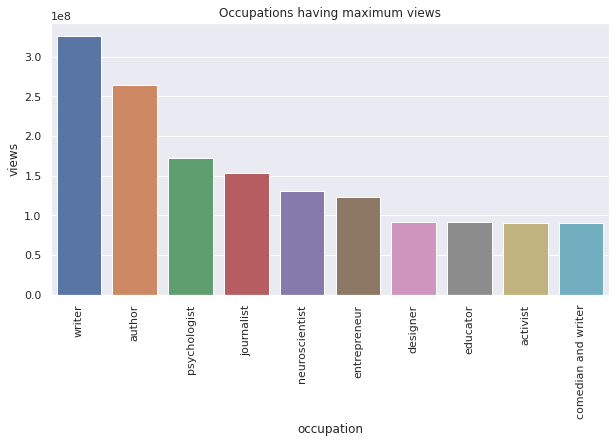

In [313]:
# Most popular Occupations in terms of no of views
occupation_views=Ted_df.groupby('occupation')['views'].sum().sort_values(ascending=False)[1:11].reset_index()
plt.figure(figsize=(10,5))
plt.title('Occupations having maximum views')
sns.barplot(x='occupation',y='views',data=occupation_views)
plt.xticks(rotation=90);


* Speakers who are Writers are most popular followed by Authors and Psychologists

In [314]:
# Most discussed Ted Talks
Ted_df.groupby('title')['comments'].sum().sort_values(ascending=False)[0:10].reset_index()


,title,comments
0,Militant atheism,6449.0
1,Do schools kill creativity?,4931.0
2,Science can answer moral questions,3424.0
3,How do you explain consciousness?,3006.0
4,My stroke of insight,2984.0
5,Your body language may shape who you are,2633.0
6,Taking imagination seriously,2529.0
7,On reading the Koran,2463.0
8,The danger of science denial,2366.0
9,The power of vulnerability,2209.0


* It seems that most of the debated topics are related to mainly Science and Religion 